In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./img/richard_feynman/pic_002.jpg')

#### Converts image to gray scale to help in Identification

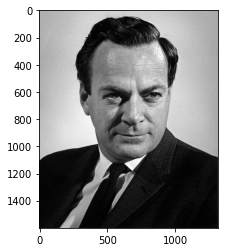

In [3]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
plt.imshow(gray, cmap = "gray")

In [4]:
#Initialized harrcascade and applies them to face and eye
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:\Python\Image Classification\A\model\opencv\haarcascades\haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5) #These are the minsize and maxsize of the image

print("Faces",faces)


Faces [[307 353 711 711]]


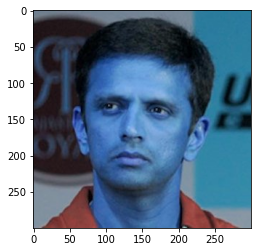

In [5]:
# Applies harrcascade to an active image, identifying eyes and face roi
cv2.destroyAllWindows()
other_image = cv2.imread('./img/Dravid/1.jpg')
for (x, y, w, h) in faces:
    
    face_img = cv2.rectangle(other_image, (x, y), (x+w, y+h), (255, 0, 0), 4)
    roi_gray = gray[y:y+h, x:x+w] #Here we specifically cascade for eyes in the face region it will provide more accuracy
    roi_color = face_img[y:y+h, x:x+w]
     
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap = "gray")
plt.show()

#### Focus on the region of interest


ValueError: zero-size array to reduction operation minimum which has no identity

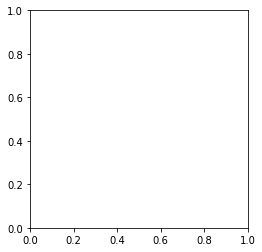

In [6]:
plt.imshow(roi_color)

In [7]:
# Define a Function to crop the face of every image
# Function would help to implement the recognition on a large data set easily
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
     
        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
#         for (ex, ey, eh, ew) in eyes:
            
#             cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), 3)
        
        
        if len(eyes) >= 2:
            return roi_color
        
        
        
        
        

ONE


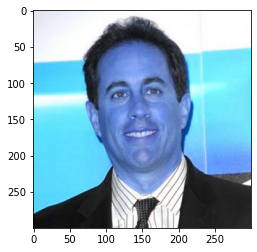

In [8]:
new_img = cv2.imread('E:\Python\Image Classification\A\model\img\jerry_seinfeld\httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg')
plt.imshow(new_img)
print("ONE")

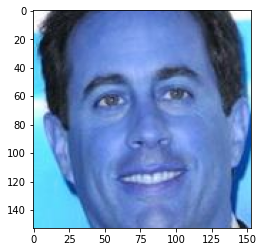

In [9]:
cropped_image = get_cropped_image('E:\Python\Image Classification\A\model\img\jerry_seinfeld\httpimagescontactmusiccomnewsimagesjerryseinfeldjpg.jpg')
plt.imshow(cropped_image)

In [10]:
# Store paths in variables to help in automation of the cropping process
path_to_data = './img/'
path_to_cr_data = './img/cropped/'


In [11]:
import os 
img_dirs = [] #Stores the path of folders present in img directory
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
        
        

In [12]:
img_dirs   


['./img/al_pacino',
 './img/ben_afflek',
 './img/cropped',
 './img/Dravid',
 './img/jerry_seinfeld',
 './img/lionel_messi',
 './img/ratan_tata',
 './img/richard_feynman',
 './img/roger_federer']

In [13]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

### Iterates through each image of the directory, crops the face roi and then stores them in cropped folder 

In [14]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs: #For Each Folder in the Image Folder
    count = 1
    if img_dir == './img/cropped':
        continue
    celebrity_name = img_dir.split('/')[-1] #Gets the name of the celebrity from the directory name
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = [] # We want to save the cropped image file paths in this dict
    for entry in os.scandir(img_dir): #For each image in the directory 
        
        roi_image = get_cropped_image(entry.path) #get cropped image 
        if roi_image is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder): # If the file path doesn't exist already, we create it
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped Folders - ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png' #Name the roi_image(cropped Image)
            cropped_file_path = cropped_folder + '/' + cropped_file_name #Set the cropped_image file path
            
            cv2.imwrite(cropped_file_path, roi_image) #Write the roi_image into that file path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) #Save the file path of that image in a dict
            count = count + 1    
print("Generation Complete")

al_pacino
Generating Cropped Folders -  ./img/cropped/al_pacino
ben_afflek
Generating Cropped Folders -  ./img/cropped/ben_afflek
Dravid
Generating Cropped Folders -  ./img/cropped/Dravid
jerry_seinfeld
Generating Cropped Folders -  ./img/cropped/jerry_seinfeld
lionel_messi
Generating Cropped Folders -  ./img/cropped/lionel_messi
ratan_tata
Generating Cropped Folders -  ./img/cropped/ratan_tata
richard_feynman
Generating Cropped Folders -  ./img/cropped/richard_feynman
roger_federer
Generating Cropped Folders -  ./img/cropped/roger_federer
Generation Complete


### Now we use PyWavlets to help models better identify the images and classify them for us

In [15]:
import numpy as np
import pywt


def w2d(img, mode = "haar", level = 1):
    imArray = img
    #DataType COnversions
    #Convert to Grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /=255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H


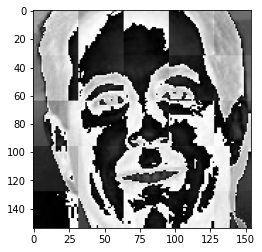

In [16]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = "gray")

In [17]:
cropped_image_dirs

['./img/cropped/al_pacino',
 './img/cropped/ben_afflek',
 './img/cropped/Dravid',
 './img/cropped/jerry_seinfeld',
 './img/cropped/lionel_messi',
 './img/cropped/ratan_tata',
 './img/cropped/richard_feynman',
 './img/cropped/roger_federer']

In [18]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    print(celebrity_name)
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

al_pacino
ben_afflek
Dravid
jerry_seinfeld
lionel_messi
ratan_tata
richard_feynman
roger_federer


{'al_pacino': ['./img/cropped/al_pacino\\al_pacino1.png',
  './img/cropped/al_pacino\\al_pacino100.png',
  './img/cropped/al_pacino\\al_pacino11.png',
  './img/cropped/al_pacino\\al_pacino12.png',
  './img/cropped/al_pacino\\al_pacino13.png',
  './img/cropped/al_pacino\\al_pacino14.png',
  './img/cropped/al_pacino\\al_pacino15.png',
  './img/cropped/al_pacino\\al_pacino16.png',
  './img/cropped/al_pacino\\al_pacino17.png',
  './img/cropped/al_pacino\\al_pacino19.png',
  './img/cropped/al_pacino\\al_pacino2.png',
  './img/cropped/al_pacino\\al_pacino20.png',
  './img/cropped/al_pacino\\al_pacino21.png',
  './img/cropped/al_pacino\\al_pacino22.png',
  './img/cropped/al_pacino\\al_pacino23.png',
  './img/cropped/al_pacino\\al_pacino24.png',
  './img/cropped/al_pacino\\al_pacino25.png',
  './img/cropped/al_pacino\\al_pacino26.png',
  './img/cropped/al_pacino\\al_pacino27.png',
  './img/cropped/al_pacino\\al_pacino28.png',
  './img/cropped/al_pacino\\al_pacino30.png',
  './img/cropped/al_pa

### The dataset must be divided into X and Y datapoints for the models to be trained on them and predict them
### Here we convert the celebrity names into numbers - they will be Y
### X - is the number of images per each celebrity

In [19]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():

    class_dict[celebrity_name] = count
    count += 1
    


class_dict


{'al_pacino': 0,
 'ben_afflek': 1,
 'Dravid': 2,
 'jerry_seinfeld': 3,
 'lionel_messi': 4,
 'ratan_tata': 5,
 'richard_feynman': 6,
 'roger_federer': 7}

In [20]:
# Using Numpy we stack the wavlet and raw image on each other, for better understanding of the model and 
# define the X & Y Coords
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_image = cv2.resize(img, (32, 32)) #We scale and resize the images to a (32, 32) 
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_image = np.vstack((scalled_raw_image.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        #And stack them, wavlet image doesn't have colors, so just 2 dimensions
        x.append(combined_image)
        y.append(class_dict[celebrity_name])
        
    
        

        

In [21]:
len(x)

297

In [22]:
len_image_array = 32*32*3 + 32*32
x = np.array(x).reshape(len(x), len_image_array).astype(float) # We reshape the integer data points of x to float 
x.shape


(297, 4096)

# Data Cleaning is Complete, now we train the model
#### We'll use SVM First

#### 1.Now as we have the images and celebrity names as the X n Y datasets 
#### 2.The model will first train on the type of images in the each celebrity name and then try n predict the celebrity name for all the images in the data set 
#### 3.Once the prediction is complete it will compare it with the actual relation between X n Y and give us a score indicating the accuracy of the predictions made by the models

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#### Support Vector machine Model is used here to train and predict the accuracy of the data set

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) #Scale and train the model using svm
pipe.fit(x_train, y_train) #Fit the training data in the model 
pipe.score(x_test, y_test) # Test it on test data n get the result

0.64

In [25]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        21
           1       0.00      0.00      0.00         2
           2       0.42      0.56      0.48         9
           3       0.00      0.00      0.00         3
           4       0.86      1.00      0.92         6
           5       1.00      0.31      0.48        16
           6       1.00      0.82      0.90        11
           7       1.00      0.29      0.44         7

    accuracy                           0.64        75
   macro avg       0.60      0.50      0.49        75
weighted avg       0.72      0.64      0.60        75



e:\python\image classification\a\newenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python\image classification\a\newenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\python\image classification\a\newenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Now using Grid Search to find the best model to train the data set


In [26]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### We define the parameters of the various models we are going to try
##### The Grid Search Cross Validates all the parameters of the models and ends up giving us the best parameter for each respective model

In [27]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True), #This is the model 
        'params' : { #These are the parameters
            'svc__C': [1,10,100,1000], 
            'svc__kernel': ['rbf','linear'] # Two different kernels, linear and rbf can be used and GridSearch will let us know which one gives the best result 
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [28]:
#Then we iterate through each of these models 
# training our data using each of these models and then finding out the best one 



scores = []
best_estimators ={}
import pandas as pd
for algo, mp in model_params.items():
    
    pipe = make_pipeline(StandardScaler(), mp['model']) #First Scale the Models
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False) #Run the Models with parameters throught the Grid Search
    clf.fit(x_train, y_train) #Fit the Grid Search on training Data
    scores.append({
        'model': algo, 
        'best_score': clf.best_score_, #in built functions of Grid SearchCV
        'best_params': clf.best_params_
        
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df


e:\python\image classification\a\newenv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
e:\python\image classification\a\newenv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
e:\python\image classification\a\newenv\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.743232,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.468485,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.725253,{'logisticregression__C': 1}


In [29]:
print(best_estimators['svm'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])


In [30]:
best_estimators['svm'].score(x_test, y_test)

0.6933333333333334

In [31]:
best_estimators['random_forest'].score(x_test, y_test)

0.4266666666666667

In [32]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.6666666666666666

In [33]:
best_clf = best_estimators['svm']

###### Confusion Matrix indicates how many images were correctly predicted for each Y

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[19,  0,  1,  0,  0,  0,  0,  1],
       [ 2,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  5,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0],
       [ 3,  0,  3,  1,  0,  8,  1,  0],
       [ 0,  0,  1,  0,  0,  0, 10,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

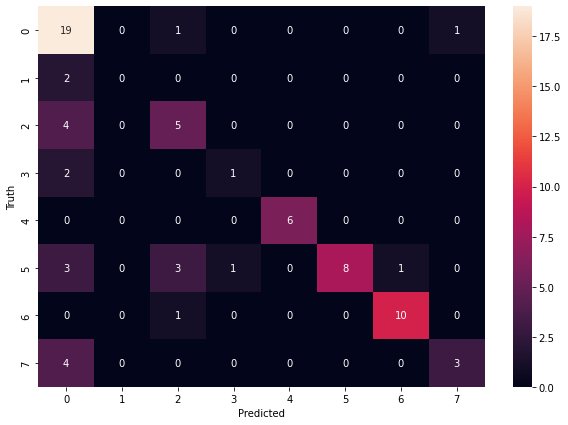

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
class_dict

{'al_pacino': 0,
 'ben_afflek': 1,
 'Dravid': 2,
 'jerry_seinfeld': 3,
 'lionel_messi': 4,
 'ratan_tata': 5,
 'richard_feynman': 6,
 'roger_federer': 7}

In [37]:
# WE IMPORT THIS MODEL (BEST ESTIMATOR) TO INTEGRATE WHILE DEVELOPMENT OF APPLICATION
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [38]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))

In [39]:
class_dict

{'al_pacino': 0,
 'ben_afflek': 1,
 'Dravid': 2,
 'jerry_seinfeld': 3,
 'lionel_messi': 4,
 'ratan_tata': 5,
 'richard_feynman': 6,
 'roger_federer': 7}